In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import qiskit
from qiskit_aer import Aer
from qiskit import transpile
from qiskit.visualization import plot_histogram
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.circuit import QuantumCircuit, QuantumRegister, AncillaRegister, Parameter
from qiskit.quantum_info import Statevector, Operator
import pylatexenc


In [2]:
def inverse_quantum_fourier_transform(n):
    quantum_register = QuantumRegister(size=n, name="x")
    inverse_QFT_circuit = QuantumCircuit(quantum_register, name=f"IQFT")

    for i, q in enumerate(reversed(quantum_register), start=1):
        for j, p in enumerate(reversed(quantum_register[n + 1 - i:]), start=1):
            inverse_QFT_circuit.cp(- np.pi / (1 << (i - j)), q, p)
        inverse_QFT_circuit.h(q)

    for q, p in zip(quantum_register[:n >> 1], reversed(quantum_register[n >> 1:])):
        inverse_QFT_circuit.swap(q, p)

    return inverse_QFT_circuit.to_gate()

                  
 q0: ──────■──────
     ┌─────┴─────┐
q_0: ┤0          ├
     │  Diagonal │
q_1: ┤1          ├
     └───────────┘


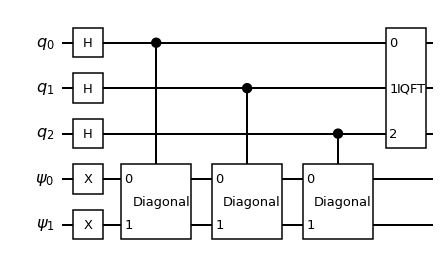

In [4]:
n= 3
q_reg = QuantumRegister(size=n, name="q")
anc_reg = AncillaRegister(size=2, name=r"\psi")
circuit = QuantumCircuit(q_reg, anc_reg, name="QPE")

Eigen_val = [1,1,1,1]

circuit.h(q_reg) # Hadamard
circuit.x(anc_reg) # preparing psi

U = qiskit.circuit.library.Diagonal(Eigen_val).control(1)
print(U)
for i, q in enumerate(q_reg):
    circuit.compose(U,[q,3,4],inplace=True)
    
circuit.compose(inverse_quantum_fourier_transform(n), inplace=True)

circuit.draw(output="mpl", style="bw")

In [10]:
# import random
# random_number = random.random()
# for j in linspace(0,2**n)
#     if random_number >=.5
#         Eigen[j] = 1
#         else
#         Eigen[j] = -1
    
# print(random_number)

0.7139578264331675
